### import requisite libraries

In [1]:
from MultiClassRFClassifier import MultiClassRFClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

### build modelling data
* load feature transformed data
* configure multiclass classification targets
* split into train and test set

In [2]:
df = pd.read_csv('data/transformed_data.csv').drop(columns=['info'])

In [3]:
ohe = OneHotEncoder()
ohe.fit(df[['target']])
targets = ohe.get_feature_names_out()
df[targets] = ohe.transform(df[['target']]).toarray()
df = df.drop(columns=['target'])

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=targets), df[targets], test_size=0.3)

### train model

In [5]:
clf = MultiClassRFClassifier(multilabel=False)
clf.fit(X_train, Y_train)

In [6]:
Y_pred = clf.predict(X_test)

### build results dataframe

In [7]:
results_dict = {
    'feature'   : [],
    'precision' : [],
    'recall'    : [],
    'f1-score'  : [],
    'support'   : [],
    'accuracy'  : [],
    'total_n'   : [],
}

In [8]:
for col in tqdm(Y_test.columns):
    # print(col)
    # print(classification_report(Y_test[col],Y_pred[col], zero_division=0))
    d = classification_report(Y_test[col],Y_pred[col], zero_division=0, output_dict=True)
    for k,v in list(d['1.0'].items()) + [('accuracy',d['accuracy']), ('total_n',d['1.0']['support']+d['0.0']['support'])]:
        results_dict[k].append(v)
    results_dict['feature'].append(col)

100%|██████████| 22/22 [00:00<00:00, 22.68it/s]


In [9]:
results_df = pd.DataFrame(results_dict)
results_df.to_csv('results/results_df.csv', index=False)
results_df.head()

,feature,precision,recall,f1-score,support,accuracy,total_n
0,target_FromInternetTCPPort443IPurn:ietf:params...,0.00000,0.000000,0.000000,401,0.954929,8897
1,target_FromInternetTCPPort443IPurn:ietf:params...,0.00000,0.000000,0.000000,415,0.953355,8897
2,target_FromInternetTCPPort554IPurn:ietf:params...,0.97619,0.106494,0.192037,385,0.961223,8897
3,target_FromInternetTCPPort554IPurn:ietf:params...,1.00000,0.111959,0.201373,393,0.960773,8897
4,target_FromInternetTCPPort80IPurn:ietf:params:...,0.99000,0.482927,0.649180,410,0.975947,8897


### plot the basic results

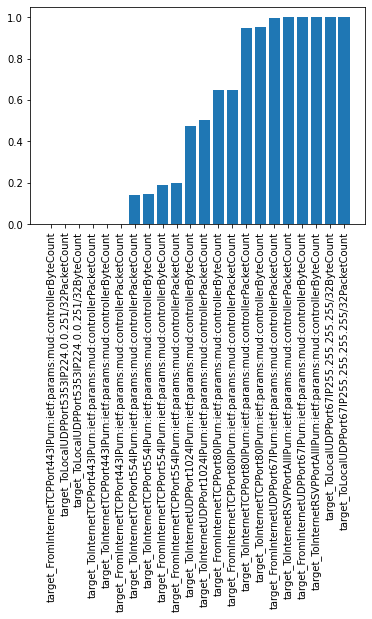

In [10]:
tmp_srt = results_df.sort_values('f1-score', ascending=True)

fig, ax = plt.subplots()

ax.bar(tmp_srt['feature'], tmp_srt['f1-score'])
plt.xticks(rotation=90)

plt.show()

In [18]:
print(X_test.columns)
print(clf.models['target_ToInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount'].feature_importances_)

Index(['mean', 'std', 'max', 'min', 'nonzero_p'], dtype='object')
[0.32075003 0.04620091 0.36228224 0.         0.27076683]


Index(['mean', 'std', 'max', 'min', 'nonzero_p'], dtype='object')